<a href="https://colab.research.google.com/github/trnq-eu/learnpytorch/blob/main/04_pytorch_custom_datasets_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. PyTorch Custom Datasets Exercises Template

Welcome to the 04. PyTorch Custom Datasets exercise template.

The best way to practice PyTorch code is to write more PyTorch code.

So read the original notebook and try to complete the exercises by writing code where it's required.

Feel free to reference the original resources whenever you need but should practice writing all of the code yourself.

## Resources

1. These exercises/solutions are based on [notebook 04 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/04_pytorch_custom_datasets/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/vsFMF9wqWx0).
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [ ]:
# Check for GPU
!nvidia-smi

Sat Jul 29 05:07:22 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0    33W /  70W |   1103MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Import torch
import torch
from torch import nn

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.0.1+cu118


'cuda'

## 1. Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.

1. Trovare più dati
2. Aumentare le epoche
3. Utilizzare un modello preaddestrato

## 2. Recreate the data loading functions we built in [sections 1, 2, 3 and 4 of notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/). You should have train and test `DataLoader`'s ready to use.

In [ ]:
# 1. Get data
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/MyDrive/"

from pathlib import Path

# setup path to Data Folder
data_path = Path("/content/gdrive/MyDrive/DATI")
image_path = data_path / 'Persone'



Mounted at /content/gdrive


In [ ]:
# converto i file web in jpg
from PIL import Image
import os

convert_folder = "/content/gdrive/MyDrive/DATI/Persone"

def convert_images(folder_path):
  webp_files = []
  for filename in os.listdir(folder_path):
    if filename.endswith("jpg"):
      image_path = os.path.join(folder_path, filename)
      img = Image.open(image_path)
      converted_img = img.convert("RGB")
      converted_img.save(image_path)

In [ ]:
# 2. Become one with the data
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning file counts of its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(image_path)

There are 2 directories and 1 images in '/content/gdrive/MyDrive/DATI/Persone'.
There are 3 directories and 0 images in '/content/gdrive/MyDrive/DATI/Persone/Train'.
There are 0 directories and 25 images in '/content/gdrive/MyDrive/DATI/Persone/Train/Monica Vitti'.
There are 0 directories and 37 images in '/content/gdrive/MyDrive/DATI/Persone/Train/Ingrid Bergman'.
There are 0 directories and 46 images in '/content/gdrive/MyDrive/DATI/Persone/Train/Sofia Loren'.
There are 3 directories and 0 images in '/content/gdrive/MyDrive/DATI/Persone/Test'.
There are 0 directories and 4 images in '/content/gdrive/MyDrive/DATI/Persone/Test/Ingrid Bergman'.
There are 0 directories and 5 images in '/content/gdrive/MyDrive/DATI/Persone/Test/Monica Vitti'.
There are 0 directories and 9 images in '/content/gdrive/MyDrive/DATI/Persone/Test/Sofia Loren'.


In [ ]:
# Setup train and testing paths
train_dir = image_path / 'Train'
test_dir = image_path / 'Test'

train_dir, test_dir

(PosixPath('/content/gdrive/MyDrive/DATI/Persone/Train'),
 PosixPath('/content/gdrive/MyDrive/DATI/Persone/Test'))

Random image path: /content/gdrive/MyDrive/DATI/Persone/Train/Sofia Loren/l-intro-1649197073.jpg
Image class: Sofia Loren
Image height: 902
Image width: 1600


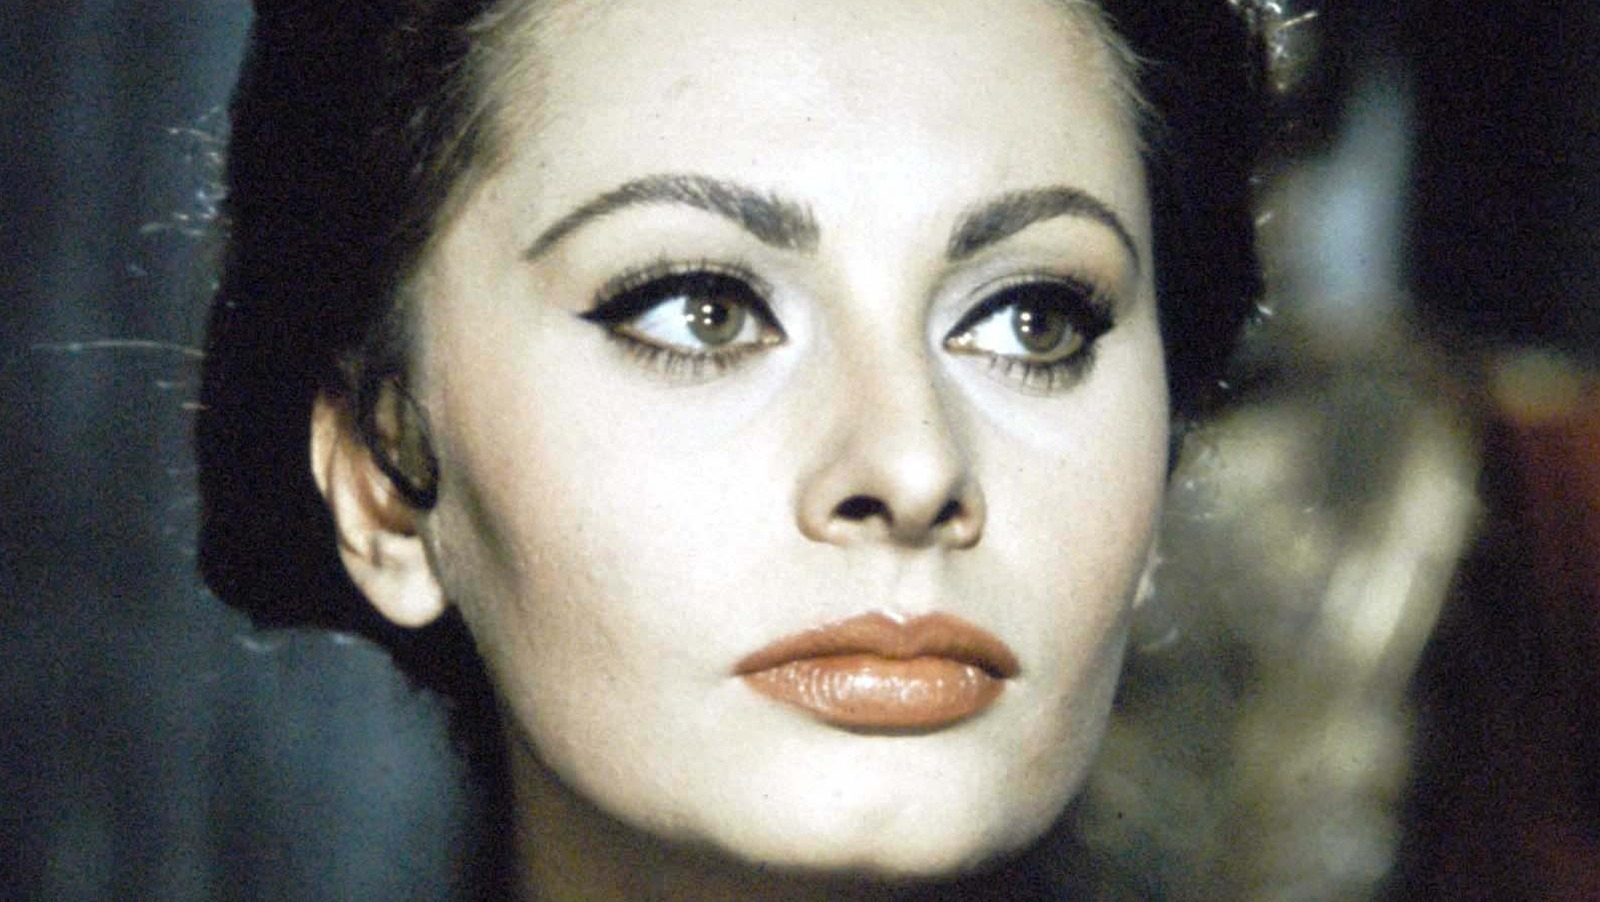

In [ ]:
# Visualize an image
import random
from PIL import Image

random.seed(42)

# 1. Ottieni i percorsi di tutte le immagini con estensione .jpg
image_path_list = list(image_path.glob('*/*/*.jpg'))

# 2. Ottieni un percorso a caso
random_image_path = random.choice(image_path_list)

# 3. Ottieni la classa a partire dal nome della cartella superiore
image_class = random_image_path.parent.stem

# 4. Apri l'immagine
img = Image.open(random_image_path)

# 5. Stampa i metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img


In [ ]:
import matplotlib.pyplot as plt
# help(plt.plot)
import torchvision.transforms as transforms

# help(transforms.Resize)

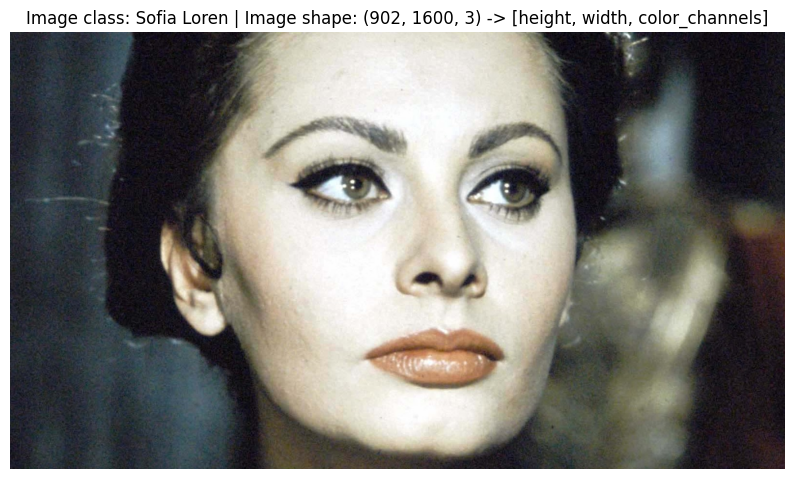

In [ ]:
# Do the image visualization with matplotlib
import numpy as np
import matplotlib.pyplot as plt

# trasforma l'immagine in un'array di np
img_as_array = np.asarray(img)

# plt dell'immagine con matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

We've got some images in our folders.

Now we need to make them compatible with PyTorch by:
1. Transform the data into tensors.
2. Turn the tensor data into a `torch.utils.data.Dataset` and later a `torch.utils.data.DataLoader`.

In [ ]:
# 3.1 Transforming data with torchvision.transforms
data_transform = transforms.Compose([
    # ridimensiona a 64x64
    transforms.Resize(size=(64, 64)),
    # ruota alcune immagini a caso in orizzontale
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0
])

In [ ]:
# Write transform for turning images into tensors


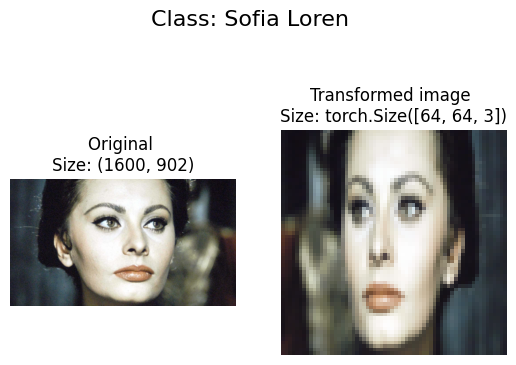

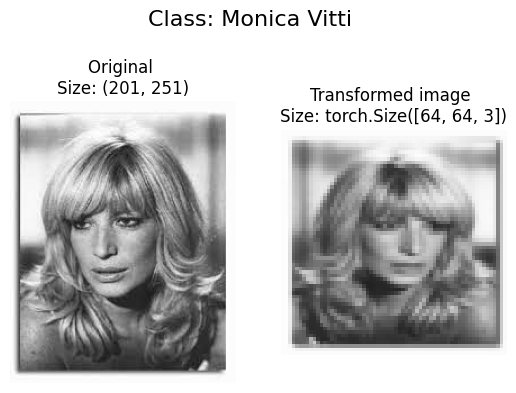

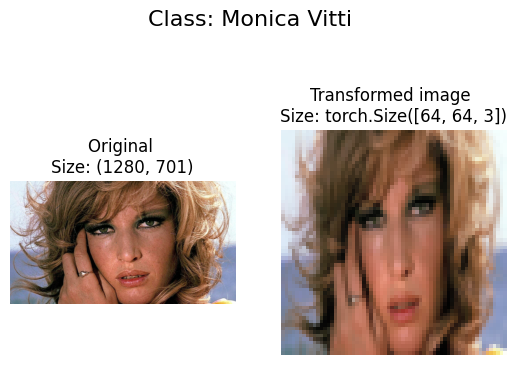

In [ ]:
# Write a function to plot transformed images
def plot_transformed_images(image_paths, transform, n=3, seed=42):
  random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(1,2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original \nSize: {f.size}")
      ax[0].axis('off')

      # Transform and plot image
      # Note: permute() will change shape of image to suit matplotlib
      # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])

      transformed_image = transform(f).permute(1,2,0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed image \nSize: {transformed_image.shape}")
      ax[1].axis('off')

      # Titolo superiore che mostra il nome della classe
      fig.suptitle(f'Class: {image_path.parent.stem}', fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)



### Load image data using `ImageFolder`

In [ ]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform = None)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")


Train data:
Dataset ImageFolder
    Number of datapoints: 105
    Root location: /content/gdrive/MyDrive/DATI/Persone/Train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 18
    Root location: /content/gdrive/MyDrive/DATI/Persone/Test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [ ]:
# Get class names as a list
class_names = train_data.classes
class_names

['Ingrid Bergman', 'Monica Vitti', 'Sofia Loren']

In [ ]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'Ingrid Bergman': 0, 'Monica Vitti': 1, 'Sofia Loren': 2}

In [ ]:
# Check the lengths of each dataset
len(train_data), len(test_data)

(105, 18)

In [ ]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=1,
                              num_workers=1,
                              shuffle=True)
test_dataloader = DataLoader(dataset=train_data,
                             batch_size=1,
                             num_workers=1,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7ba9300b4160>,
 <torch.utils.data.dataloader.DataLoader at 0x7ba9300b5150>)

In [ ]:
# How many batches of images are in our data loaders?
len(train_dataloader), len(test_dataloader)

(105, 105)

In [ ]:
img, label = next(iter(train_dataloader))
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


## 3. Recreate `model_0` we built in section 7 of notebook 04.

In [ ]:
class tiny_VGG(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels = hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(hidden_units,
                  hidden_units,
                  kernel_size=3,
                  padding=1
                  ),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*16*16,
                  out_features = output_shape)
    )

  def forward(self, x: torch.Tensor):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return(x)

## 4. Create training and testing functions for `model_0`.

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):

  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader and data batches
  for batch, (X, y) in enumerate(dataloader):

    # Send data to target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)

    # 2. Calculate and accumulate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()


    # 3. Optimizer zero grad
    optimizer.zero_grad()


    # 4. Loss backward
    loss.backward()


    # 5. Optimizer step
    optimizer.step()


    # Calculate and accumualte accuracy metric across all batches
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)


  # Adjust metrics to get average loss and average accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc


In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):

  # Put model in eval mode
  model.eval()

  # Setup the test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():

    # Loop through DataLoader batches
    for batch, (X,y) in enumerate(dataloader):

      # Send data to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)

      # 2. Calculuate and accumulate loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()


      # Calculate and accumulate accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))


  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc


In [ ]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

  # Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # Loop through the training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    # Test step
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)

    # Print out what's happening
    print(f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
    )

    # Update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # Return the results dictionary
  return results

## 5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?
* Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer.

In [ ]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_0 = tiny_VGG(input_shape = 3,
                   hidden_units = 10,
                   output_shape = len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(),
                             lr=0.001)

model_0_results = train(model = model_0,
                        train_dataloader = train_dataloader,
                        test_dataloader = test_dataloader,
                        loss_fn = loss_fn,
                        optimizer = optimizer)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1102 | train_acc: 0.3810 | test_loss: 1.0785 | test_acc: 0.3619
Epoch: 2 | train_loss: 1.0948 | train_acc: 0.4000 | test_loss: 1.0794 | test_acc: 0.4095
Epoch: 3 | train_loss: 1.0917 | train_acc: 0.4095 | test_loss: 1.0739 | test_acc: 0.4095
Epoch: 4 | train_loss: 1.0949 | train_acc: 0.4000 | test_loss: 1.0773 | test_acc: 0.4095
Epoch: 5 | train_loss: 1.0813 | train_acc: 0.3619 | test_loss: 1.0730 | test_acc: 0.4095


In [ ]:
# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_0 = tiny_VGG(input_shape = 3,
                   hidden_units = 10,
                   output_shape = len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(),
                             lr=0.001)
'''
model_0_results = train(model = model_0,
                        train_dataloader = train_dataloader,
                        test_dataloader = test_dataloader,
                        loss_fn = loss_fn,
                        optimizer = optimizer,
                        epochs=20)
'''

'\nmodel_0_results = train(model = model_0,\n                        train_dataloader = train_dataloader,\n                        test_dataloader = test_dataloader,\n                        loss_fn = loss_fn,\n                        optimizer = optimizer,\n                        epochs=20)\n'

In [ ]:
# Train for 50 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_0 = tiny_VGG(input_shape = 3,
                   hidden_units = 10,
                   output_shape = len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(),
                             lr=0.001)

'''model_0_results = train(model = model_0,
                        train_dataloader = train_dataloader,
                        test_dataloader = test_dataloader,
                        loss_fn = loss_fn,
                        optimizer = optimizer,
                        epochs=50)'''

'model_0_results = train(model = model_0,\n                        train_dataloader = train_dataloader,\n                        test_dataloader = test_dataloader,\n                        loss_fn = loss_fn,\n                        optimizer = optimizer,\n                        epochs=50)'

It looks like our model is starting to overfit towards the end (performing far better on the training data than on the testing data).

In order to fix this, we'd have to introduce ways of preventing overfitting.

## 6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

In [ ]:
# Double the number of hidden units and train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_0 = tiny_VGG(input_shape = 3,
                   hidden_units = 20,
                   output_shape = len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(),
                             lr=0.001)


model_0_results = train(model = model_0,
                        train_dataloader = train_dataloader,
                        test_dataloader = test_dataloader,
                        loss_fn = loss_fn,
                        optimizer = optimizer,
                        epochs=50)


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0982 | train_acc: 0.4000 | test_loss: 1.0830 | test_acc: 0.3524
Epoch: 2 | train_loss: 1.0947 | train_acc: 0.3714 | test_loss: 1.0512 | test_acc: 0.4095
Epoch: 3 | train_loss: 1.0651 | train_acc: 0.4000 | test_loss: 1.0099 | test_acc: 0.4190
Epoch: 4 | train_loss: 0.9945 | train_acc: 0.5238 | test_loss: 0.8804 | test_acc: 0.6381
Epoch: 5 | train_loss: 0.8829 | train_acc: 0.6190 | test_loss: 0.8230 | test_acc: 0.6762
Epoch: 6 | train_loss: 0.8133 | train_acc: 0.7048 | test_loss: 0.7252 | test_acc: 0.7333
Epoch: 7 | train_loss: 0.7051 | train_acc: 0.7333 | test_loss: 0.5773 | test_acc: 0.7714
Epoch: 8 | train_loss: 0.6668 | train_acc: 0.7238 | test_loss: 0.5520 | test_acc: 0.7714
Epoch: 9 | train_loss: 0.6025 | train_acc: 0.7333 | test_loss: 0.4364 | test_acc: 0.8190
Epoch: 10 | train_loss: 0.5241 | train_acc: 0.8000 | test_loss: 0.4006 | test_acc: 0.8381
Epoch: 11 | train_loss: 0.3841 | train_acc: 0.8571 | test_loss: 0.2811 | test_acc: 0.8857
Epoch: 12 | train_l

It looks like the model is still overfitting, even when changing the number of hidden units.

To fix this, we'd have to look at ways to prevent overfitting with our model.

## 7. Double the data you're using with your model from step 6 and train it for 20 epochs, what happens to the results?
* **Note:** You can use the [custom data creation notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) to scale up your Food101 dataset.
* You can also find the [already formatted double data (20% instead of 10% subset) dataset on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip), you will need to write download code like in exercise 2 to get it into this notebook.

In [ ]:
# Download 20% data for Pizza/Steak/Sushi from GitHub
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data
'''
with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
    print("Downloading pizza, steak, sushi 20% data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi 20% data...")
    zip_ref.extractall(image_path)
'''

Did not find data/pizza_steak_sushi_20_percent directory, creating one...


'\nwith open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:\n    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")\n    print("Downloading pizza, steak, sushi 20% data...")\n    f.write(request.content)\n\n# Unzip pizza, steak, sushi data\nwith zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:\n    print("Unzipping pizza, steak, sushi 20% data...")\n    zip_ref.extractall(image_path)\n'

In [ ]:
# See how many images we have
walk_through_dir(image_path)

There are 0 directories and 0 images in 'data/pizza_steak_sushi_20_percent'.


Excellent, we now have double the training and testing images...

In [ ]:
# Create the train and test paths
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path

(PosixPath('data/pizza_steak_sushi_20_percent/train'),
 PosixPath('data/pizza_steak_sushi_20_percent/test'))

In [ ]:
# Turn the 20 percent datapaths into Datasets and DataLoaders
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

simple_transform = transforms.Compose([
  transforms.Resize((64, 64)),
  transforms.ToTensor()
])

# Create datasets


# Create dataloaders


In [ ]:
# Train a model with increased amount of data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

## 8. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) with your trained model from exercise 7 and share your prediction.
* Does the model you trained in exercise 7 get it right?
* If not, what do you think you could do to improve it?

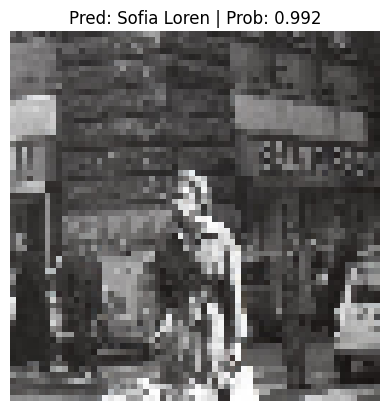

In [ ]:
import torchvision
from typing import Tuple, Dict, List

custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])

custom_image_path = '/content/gdrive/MyDrive/DATI/Persone/Screenshot__resize.jpg'

def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform = None,
                        device: torch.device = device):
  # 1. Load in image and convert the tensor values to float32
  target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

  # 2. Divide the image pixel values by 255 to get them between [0, 1]
  target_image = target_image / 255

  # 3. Transform if necessary
  if transform:
    target_image = transform(target_image)

  # 4. Make sure the model is on the target device
  model = model.to(device)

  # 5. Turn on model evaluation mode and inference mode
  model.eval()

  with torch.inference_mode():
    # Add an extra dimension to the image
    target_image = target_image.unsqueeze(dim=0)

    # Make a prediction on image with an extra dimension and send it to the target device
    target_image_pred = model(target_image.to(device))

    # 6. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert prediction probabilities -> Prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 8. Plot the image alongside the prediction and prediction probability
    plt.imshow(target_image.squeeze().permute(1,2,0))
    if class_names:
      title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else:
      title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False)



pred_and_plot_image(model=model_0,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform = custom_image_transform,
                    device=device)